In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("data.csv")

In [21]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,58
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,62
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,6
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,37
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,71


In [22]:
df['city']

0       36
1       35
2       18
3        3
4       31
        ..
4595    35
4596     3
4597    32
4598    35
4599     9
Name: city, Length: 4600, dtype: int64

In [3]:
df = df.drop(['date', 'street', 'country'], axis=1)
le_city = LabelEncoder()
le_zip = LabelEncoder()
df['city'] = le_city.fit_transform(df['city'])
df['statezip'] = le_zip.fit_transform(df['statezip'])
print("Missing values:\n", df.isnull().sum())

Missing values:
 price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64


In [4]:
X = df.drop("price", axis=1)
y = df["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 992929.7532523681
R² Score: 0.033276429849473765


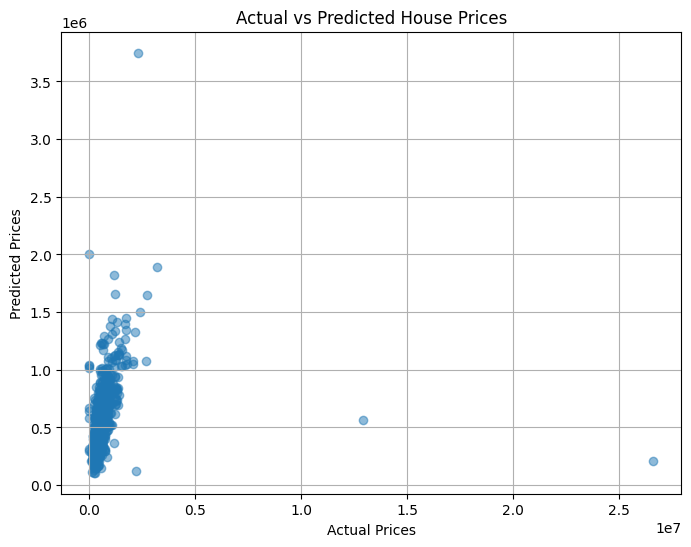

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [9]:
compare = pd.DataFrame( {'Actual' : y_test, 'Prediction' : y_pred.astype(int) })
print("\nActual vs Prediction: \n", compare.head())


Actual vs Prediction: 
          Actual  Prediction
3683   544000.0      305662
4411        0.0      311782
2584  1712500.0     1081407
69     365000.0      570789
1844   275000.0      383478


In [13]:
le=LabelEncoder()
df["city"]=le.fit_transform(df["city"])

In [18]:
new_city = "Mumbai"
new_city_index = le.transform([new_city]) [0]
new_data = [[1200, 3, new_city_index ] ]
predict = model.predict(new_data)
print(f"Predicted Rent based on this data is {predict}")

ValueError: invalid literal for int() with base 10: np.str_('Mumbai')

In [19]:
print("Available locations:\n", le.classes_)
 42 43]

Available locations:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [23]:
new_location = "36"  # use city from le.classes_
sqft = 1200
rooms = 3

if new_location in le.classes_:
    new_location_index = le.transform([new_location])[0]
    new_data = [[sqft, rooms, new_location_index]]
    predict = model.predict(new_data)
    print(f"✅ Predicted Rent based on this data is ₹{predict[0]:,.2f}")
else:
    print(f"❌ Location '{new_location}' not found in training data.\nPlease choose from:\n{list(le.classes_)}")


❌ Location '36' not found in training data.
Please choose from:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43)]
